# Applying GDD in $\omega$ domain

It's customary in ultrafast optics to make a series expansion of the spectral phase:

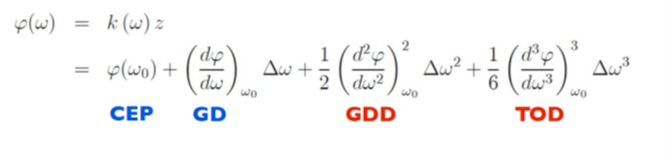

where

$\Delta\omega = (\omega-\omega_0)$

CEP = $\phi(\omega_0)$

Group Delay = GD = $\left(\frac{d\phi}{d\omega}\right)_{\omega_0}$

Group Delay Dispersion = GDD = $\left(\frac{d^2\phi}{d\omega^2}\right)^2_{\omega_0}$

Third Order Dispersion = TOD = $\left(\frac{d^3\phi}{d\omega^3}\right)^3_{\omega_0}$

So here's how you implemnt the GDD:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# set up frequency axis
c = 300 # nm/fs
lambda0 = 800 # centre wavelenght, nm
omega0 = 2 * np. pi * c/lambda0 # rad/fs
domega = 2 # for example, rad/fs
omega = np.linspace(omega0-domega/2, omega0+domega/2, 1000) # omega axis rad/fs


In [63]:
# set up field (Gaussian)
E0 = 1 # arb. units
E_transform_limited = E0 * np.exp(-2 * np.log(2) * (omega-omega0)**2/domega**2)

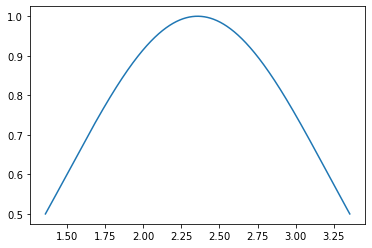

In [66]:
# spectral intensity
plt.plot(omega, np.abs(E_transform_limited)**2)
plt.show()

Now add some phase:

In [67]:
CEP  = np.pi/2 # for example, rad
GD = 0 # GD relates to absolute arrival times, so not physically important
GDD = 100 # for example, fs**2
TOD = 0 # maybe later, fs**3

In [68]:
def get_phi(omega, omega0, CEP, GDD, TOD):
    return CEP + GD * (omega-omega) + (1/2) * GDD * (omega-omega0)**2 + (1/6) * TOD * (omega-omega0)**3 

In [69]:
phi = get_phi(omega, omega0, CEP, GDD, TOD)

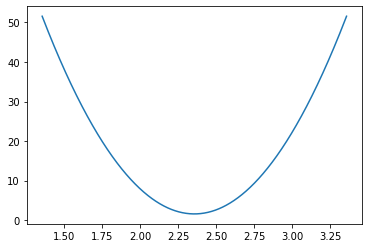

In [70]:
plt.plot(omega, phi)
plt.show()

In [71]:
E_with_phase_included = E_transform_limited * np.exp(phi * 1J) 

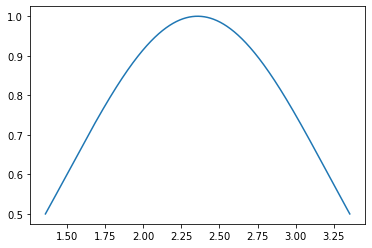

In [72]:
# intensity
plt.plot(omega, np.abs(E_with_phase_included)**2)
plt.show()

Note that intensity vs $\omega$ is not changed by including the $\phi(\omega)$, but it will change the pulse $I(t)$ in the time domain!

Extract phase from field:

In [73]:
phase = np.angle(E_with_phase_included)

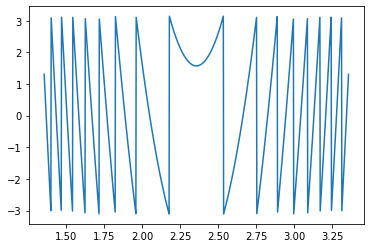

In [74]:
plt.plot(omega, phase)
plt.show()

phase needs to be "unwrapped"

In [75]:
phase = np.unwrap(phase)

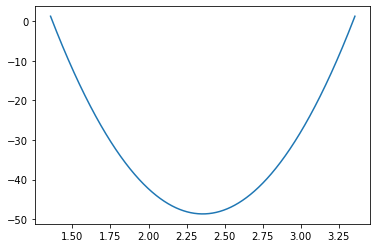

In [76]:
plt.plot(omega, phase)
plt.show()